In [6]:
import win32com.client as wc
import numpy as np
from PIL import Image

In [4]:
def create_cyclone(Dc, Le, Ls, Lc, Lco, Dl, width, inlet_length, Ds, Lb, file_name):
    '''This function requires opened Inventor window. Tested with Autodesk Inventor 2025'''
    inv = wc.GetActiveObject("Inventor.Application")
    inv_part_document = inv.Documents.Add(12290, inv.FileManager.GetTemplateFile(12290, 8962))
    part_comp_definition = inv_part_document.ComponentDefinition
    
    # Create cylinder: diameter Dc, height Ls + Lc
    sketch = part_comp_definition.Sketches.Add(part_comp_definition.WorkPlanes.Item(3))
    tg = inv.TransientGeometry
    center = tg.CreatePoint2d(0,0)
    sketch.SketchCircles.AddByCenterRadius(center, Dc) # Variable Dc
    solid_profile = sketch.Profiles.AddforSolid()
    ext_solid_def = part_comp_definition.Features.ExtrudeFeatures.CreateExtrudeDefinition(solid_profile, 20481)
    ext_solid_def.SetDistanceExtent(Ls + Lc, 20994)
    part_comp_definition.Features.ExtrudeFeatures.Add(ext_solid_def)
    
    # Loft
    plane = part_comp_definition.Sketches.Add(part_comp_definition.WorkPlanes.Item(3))
    part_comp_definition.WorkPlanes.AddByPlaneAndOffset(plane, Lco)
    sketch1 = part_comp_definition.Sketches.Add(part_comp_definition.WorkPlanes.Item(4))
    center1 = tg.CreatePoint2d(0,0)
    sketch1.SketchCircles.AddByCenterRadius(center1, Dl)
    oProfile1 = sketch.Profiles.AddForSolid(True)
    oProfile2 = sketch1.Profiles.AddForSolid(True)
    osection = inv.TransientObjects.CreateObjectCollection()
    osection.Add(oProfile1)
    osection.Add(oProfile2)
    loft_solid_def = part_comp_definition.Features.LoftFeatures.CreateLoftDefinition(osection, 20481)
    part_comp_definition.Features.LoftFeatures.Add(loft_solid_def)
    
    # Create inlet
    plane = part_comp_definition.Sketches.Add(part_comp_definition.WorkPlanes.Item(3))
    part_comp_definition.WorkPlanes.AddByPlaneAndOffset(plane, - (Ls + Lc))
    point1 = tg.CreatePoint2d(-Dc,0)
    point2 = tg.CreatePoint2d(- inlet_length + width, - inlet_length)
    sketch2 = part_comp_definition.Sketches.Add(part_comp_definition.WorkPlanes.Item(5))
    rect = sketch2.SketchLines.AddAsTwoPointRectangle(point1, point2)
    solid_profile = sketch2.Profiles.AddforSolid()
    ext_solid_def = part_comp_definition.Features.ExtrudeFeatures.CreateExtrudeDefinition(solid_profile, 20481)
    ext_solid_def.SetDistanceExtent(Le, 20993)
    part_comp_definition.Features.ExtrudeFeatures.Add(ext_solid_def)
    
    # Create gas outlet
    plane2 = part_comp_definition.Sketches.Add(part_comp_definition.WorkPlanes.Item(3))
    offset = outlet_height - Lc
    part_comp_definition.WorkPlanes.AddByPlaneAndOffset(plane2, - (Ls + Lc) - offset)
    sketch3 = part_comp_definition.Sketches.Add(part_comp_definition.WorkPlanes.Item(6))
    point_gas = tg.CreatePoint2d(0,0)
    sketch3.SketchCircles.AddByCenterRadius(center, Ds)
    solid_profile = sketch3.Profiles.AddforSolid()
    out_solid_def = part_comp_definition.Features.ExtrudeFeatures.CreateExtrudeDefinition(solid_profile, 20485)
    out_solid_def.SetDistanceExtent(outlet_height, 20993)
    part_comp_definition.Features.ExtrudeFeatures.Add(out_solid_def)
    
    # Create particle outlet
    solid_profile = sketch1.Profiles.AddforSolid()
    out_part_solid_def = part_comp_definition.Features.ExtrudeFeatures.CreateExtrudeDefinition(solid_profile, 20481)
    out_part_solid_def.SetDistanceExtent(Lb, 20993)
    part_comp_definition.Features.ExtrudeFeatures.Add(out_part_solid_def)
    
    # Save project
    inv.ActiveDocument.SaveAs(f"D:\\Python Projects\\Inventor\\{file_name}.ipt", False)
    
    return None

In [7]:
img = Image.open('cyclone_dimensions.PNG')

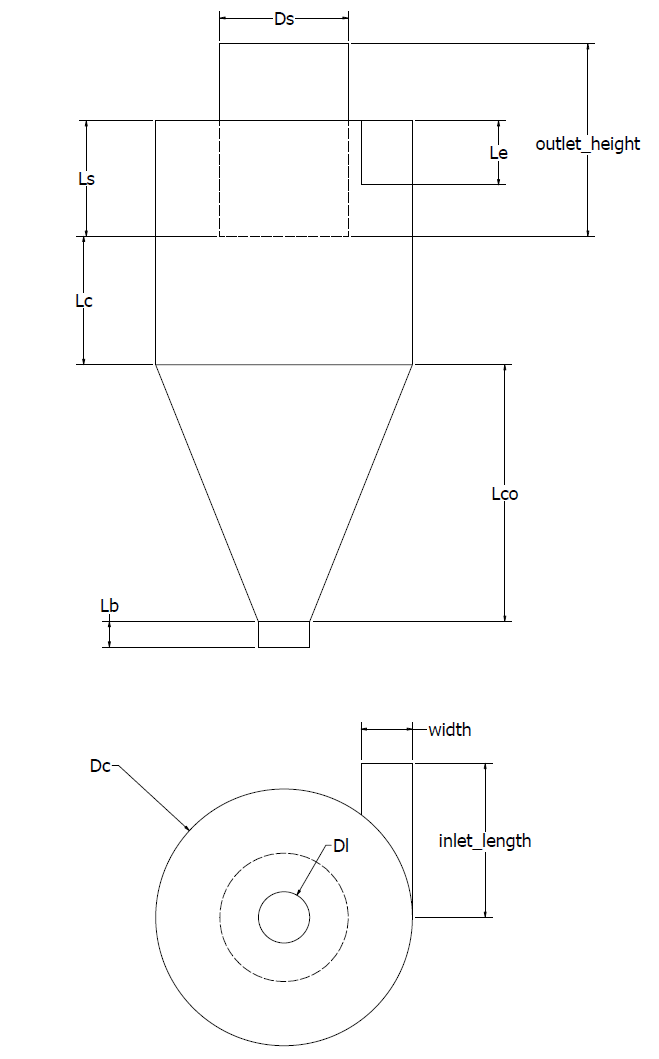

In [9]:
display(img)

In [5]:
Dc = 0.1
Le = 0.05
Ls = 0.1
Lc = 0.09
Lco = 0.2
Dl = 0.02
width = 0.06
inlet_length = 0.12
outlet_height = 0.15
Ds = 0.05
Lb = 0.02
file_name = 'cyclone_test1'
create_cyclone(Dc, Le, Ls, Lc, Lco, Dl, width, inlet_length, Ds, Lb, file_name)